<a href="https://colab.research.google.com/github/r2x4/machine_alura_oracle/blob/main/regresion_lineal/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [1]:
#Leyendo los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

datos = pd.read_csv('/content/precios_casas.csv')
datos.sample(10)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
406,412,98.1024,0,0.0000,1,572,0,714850.00
1263,1283,96.6160,0,0.0000,2,484,0,741965.00
1408,1431,68.1886,1,102.5616,2,372,0,947250.20
425,431,44.8707,1,46.8216,1,264,0,421022.00
702,717,146.4104,1,90.8562,1,704,0,786335.00
560,571,160.5312,0,0.0000,2,576,0,703018.00
1128,1147,120.5842,0,0.0000,2,403,0,887400.00
797,813,96.9876,0,0.0000,1,504,0,276045.49
4,5,106.3705,1,97.8237,2,836,0,1232500.00
1299,1320,88.0692,0,0.0000,1,248,0,547230.00


In [2]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [3]:
# eliminar columna

datos = datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  
* De -1 a 0 es inversamente proporcional
* de 0 a 1 es directamente proporcional crecen hacia el mismo lado



In [4]:
# Correlación

corr = datos.corr()

In [5]:
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


In [6]:
# Actividad
# Cuáles factores están más correlacionados?


Ejercicio de practica



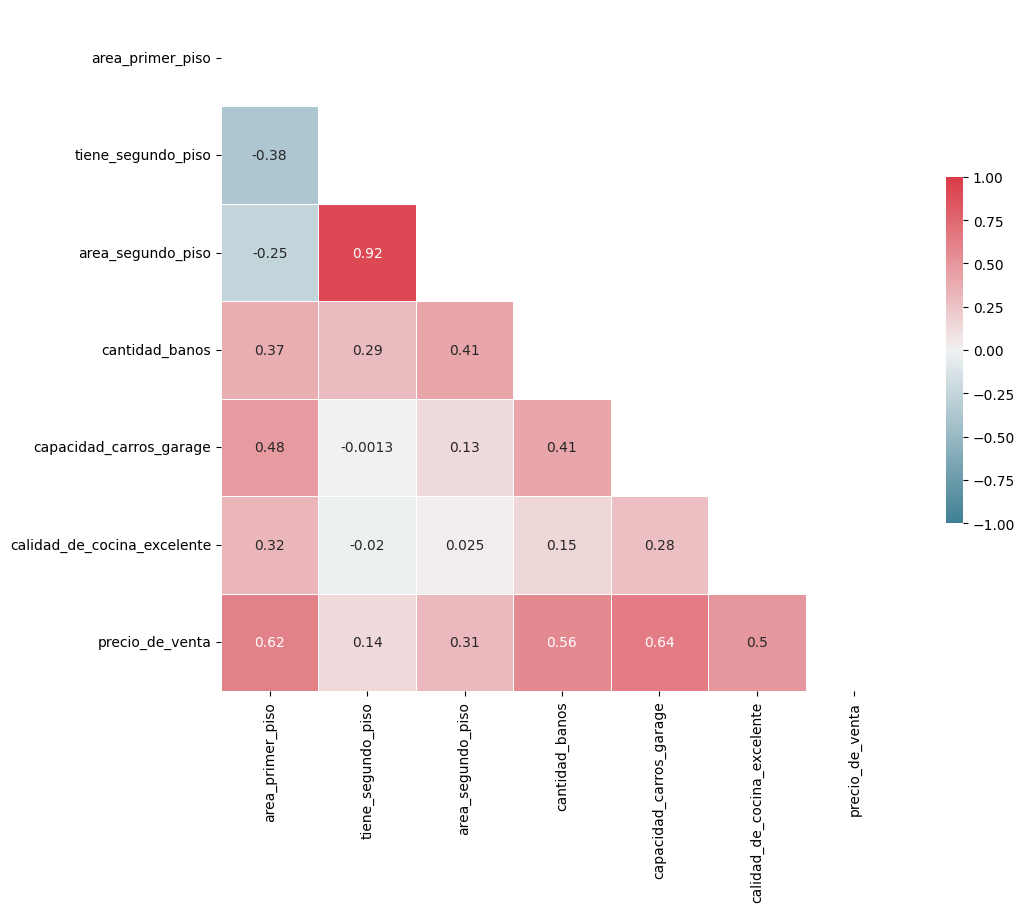

In [7]:
# Correlación
corr = datos.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## Relacionando variables

In [8]:
# importando los paquetes para la visualización


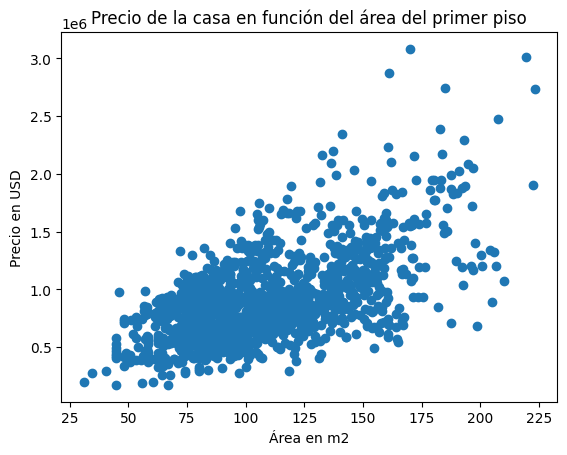

In [9]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(x=datos['area_primer_piso'], y=datos['precio_de_venta'])
plt.title('Precio de la casa en función del área del primer piso')
plt.xlabel('Área en m2')
plt.ylabel('Precio en USD')
plt.show()

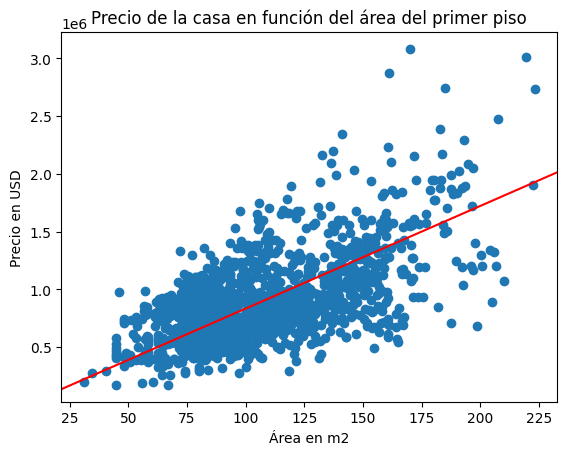

In [10]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(x=datos['area_primer_piso'], y=datos['precio_de_venta'])
plt.axline(xy1=(40, 300000),xy2=(175,1500000), color='red')
plt.title('Precio de la casa en función del área del primer piso')
plt.xlabel('Área en m2')
plt.ylabel('Precio en USD')
plt.show()

## Mejor recta

In [49]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos, x='area_primer_piso', y='precio_de_venta',trendline_color_override='red', trendline='ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

In [12]:
#Quién es nuestra variable de respuesta?


### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [13]:
# import train_test_split


In [14]:
#Datos de entrenamiento para usar la fórmula


In [15]:
# import ols


In [16]:
# ajustando el primer modelo


## Analizando los coeficientes

(intensidad, dirección y significancia)




In [17]:
# visualizando los parámetros


In [18]:
# El resumen del modelo


- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [19]:
# observando el R²


## Entendiendo el resíduo

In [20]:
# Quiénes son los residuos?


In [21]:
# Cómo están distribuidos


<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [22]:
# definiendo la 'Y' prevista


In [23]:
# importando el r2_score


In [24]:
# mostrando el resultado de r²


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

In [25]:
# cuáles otras características podrían explicar el precio de los inmuebles?


In [26]:
#Vamos a analizar solamente y_vars='precio_de_venta'


## Añadiendo factores al modelo

In [27]:
# importando la api de statsmodels


In [28]:
# Añadiendo una constante


In [29]:
# Creando el modelo de regresión (con todas las variables): saturado


In [30]:
# Modelo sin el área del segundo piso


In [31]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso


In [32]:
# Resumen del modelos


## Comparando los modelos
Cuál es el modelo?


In [33]:
# Cuántos parámetros tiene el modelo?


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [34]:
# Añadiendo una constante en X_test


In [35]:
# Previsión con el modelo 3


In [36]:
# Cuál es el r² de la previsión?


In [37]:
# Cuál es el R² del entrenamiento?


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [38]:
#Nuevo inmueble


In [39]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?


In [40]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [41]:
# Leyendo varias casas?


In [42]:
# Añadiendo una constante


In [43]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [44]:
# importar el VIF de statsmodel


In [45]:
# VIF 1


In [46]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">